In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import re

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#import fasttext
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from code_utils.utils import preprocess

In [19]:
df_ipcc=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_ipcc_model.json')

In [20]:
df_not_ipcc=pd.read_json(module_path+f'\\IPCC_bibliography\\AR6\\structured_data\\data_not_ipcc.jsonl', lines= True)

In [21]:
df_ipcc=df_ipcc[['doi', 'title_OA','topics']]

In [22]:
df_not_ipcc=df_not_ipcc[['doi', 'title_OA','topics']]

In [23]:
df_ipcc['label']=1
df_not_ipcc['label']=0

In [24]:
df_ipcc=df_ipcc.drop_duplicates(subset=['doi'])

In [25]:
len(df_ipcc)

54528

In [26]:
len(df_not_ipcc)

54532

In [27]:
df_ipcc=df_ipcc[pd.isna(df_ipcc.topics)==False]

In [28]:
df_not_ipcc=df_not_ipcc.iloc[:len(df_ipcc),:]

In [29]:
df_all=pd.concat([df_ipcc,df_not_ipcc]).reset_index()
del df_all['index']

In [30]:
df_all["topics_name"]=df_all["topics"].apply(lambda x: [y.get('name') for y in x])

fasttext

In [48]:
df_all["title_topics"]=df_all["title_OA"]+" "+df_all["topics_name"]


In [49]:
df_all['label'] = '__label__' + df_all['label'].astype(str)

In [57]:
df_all['category_description'] = df_all['label'] + ' ' + df_all['title_topics']
df_all.loc[:,'category_description']=df_all.loc[:,'category_description'].apply(lambda x: str(x).lower())

In [58]:
train, test = train_test_split(df_all, test_size=0.2, stratify=df_all["label"])

In [60]:
test["label"].value_counts(normalize=True)

label
__label__ipcc_like        0.5
__label__not_ipcc_like    0.5
Name: proportion, dtype: float64

In [61]:
train.to_csv("ipcc.train", columns=["category_description"], index=False, header=False)
test.to_csv("ipcc.test", columns=["category_description"], index=False, header=False)

In [62]:
model = fasttext.train_supervised(input="ipcc.train", epoch=5)
model.test("ipcc.test")

(18117, 0.9490533752828835, 0.9490533752828835)

decision tree

In [31]:
del df_all['topics']

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import neattext as nt
import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
import matplotlib

In [36]:
df_all=df_all.dropna()

In [37]:
mlb = MultiLabelBinarizer()
tfidf = TfidfVectorizer()

In [38]:
titles=list(df_all['title_OA'].apply(nfx.remove_stopwords))

In [39]:
titles

['Emergency Preparedness Public Health',
 'Climate Change',
 'Cause-Specific Risk Hospital Admission Related Extreme Heat Older Adults',
 'Novel Coronavirus Originating Wuhan, China',
 'Cascading Risks COVID-19 Resurgence Active 2020 Atlantic Hurricane Season',
 'Response COVID-19 Taiwan',
 'Establishing Health Care Performance Standards Era Consumerism',
 'Climate Change',
 'Adapting Effects Climate Change Practice Dermatology—A Action',
 'Association Animal Plant Protein Intake All-Cause Cause-Specific Mortality',
 'Association Short Interpregnancy Interval Pregnancy Outcomes According Maternal Age',
 'Current Future Spatiotemporal Patterns Lyme Disease Reporting Northeastern United States',
 'Association Changes Timing Spring Onset Asthma Hospitalization Maryland',
 'Rotavirus Vaccination Global Burden Rotavirus Diarrhea Children Younger 5 Years',
 'Tradable quotas: information technology cap national carbon emissions',
 'Introduction special issue sensitivity analysis',
 'Controlli

In [40]:
tfidf  = TfidfVectorizer()
corpus = tfidf.fit_transform(titles)

In [41]:
vectorizer = CountVectorizer()
corpus = vectorizer.fit_transform(titles)

In [42]:
corpus

<108265x90302 sparse matrix of type '<class 'numpy.int64'>'
	with 964983 stored elements in Compressed Sparse Row format>

In [43]:
corpus = df_all['title_OA']
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus).toarray()
y=df_all['label']

MemoryError: Unable to allocate 72.9 GiB for an array with shape (108265, 90345) and data type int64

In [20]:
pd.DataFrame(mlb.fit_transform(df_all['topics_name']), columns=mlb.classes_)

,"14-3-3 Proteins: Structure, Function, and Regulation",3D Bioprinting Technology,3D Concrete Printing Technology,3D Geospatial Modelling Techniques,4D Printing Technologies,ABCD Analysis in Scholarly Research and Business,ATP Synthase Function and Regulation,Abdominal Compartment Syndrome and Intra-abdominal Hypertension,Academic Stress and Coping Strategies,Accelerating Materials Innovation through Informatics,...,Youth Employment in Global Context,Youth Identity Politics in Contemporary Russia,Youth Transitions and Social Inequality,Youth and Public Policy in Brazil,Zebrafish as a Model Organism for Multidisciplinary Research,Zeolite Chemistry and Catalysis,Zinc Oxide Nanostructures,eXtensible Business Reporting Language,mTOR Signaling in Growth and Disease,p-adic Models in Mathematical Physics
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#pd.concat([pd.DataFrame(df_all['title_OA'].apply(nfx.remove_stopwords)),pd.DataFrame(mlb.fit_transform(df_all['topics_name']), columns=mlb.classes_)], axis=1).dropna()

In [22]:
X=pd.DataFrame(mlb.fit_transform(df_all['topics_name']), columns=mlb.classes_)
y=df_all['label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
dtree = DecisionTreeClassifier(max_leaf_nodes=50, random_state=0)
dtree = dtree.fit(X_train, y_train)

In [29]:
matplotlib.pyplot.set_loglevel (level = 'info')

[Text(0.6, 0.8333333333333334, 'Climate Change and Variability Research <= 0.5\ngini = 0.5\nsamples = 86284\nvalue = [43376, 42908]'),
 Text(0.4, 0.5, 'Economic Implications of Climate Change Policies <= 0.5\ngini = 0.496\nsamples = 79168\nvalue = [43335, 35833]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.491\nsamples = 76341\nvalue = [43335, 33006]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2827\nvalue = [0, 2827]'),
 Text(0.8, 0.5, 'gini = 0.011\nsamples = 7116\nvalue = [41, 7075]')]

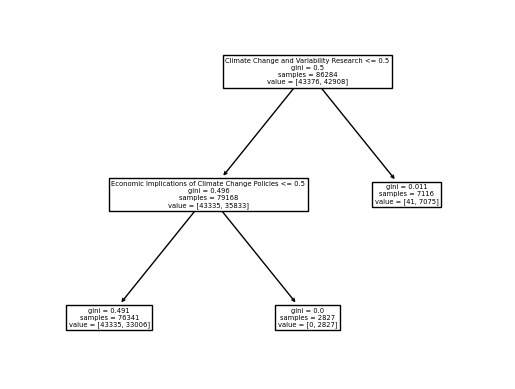

In [34]:
#3
tree.plot_tree(dtree, feature_names=list(X.columns))

[Text(0.8333333333333334, 0.95, 'Climate Change and Variability Research <= 0.5\ngini = 0.5\nsamples = 86284\nvalue = [43376, 42908]'),
 Text(0.75, 0.85, 'Economic Implications of Climate Change Policies <= 0.5\ngini = 0.496\nsamples = 79168\nvalue = [43335, 35833]'),
 Text(0.6666666666666666, 0.75, 'Impact of Climate Change on Human Migration <= 0.5\ngini = 0.491\nsamples = 76341\nvalue = [43335, 33006]'),
 Text(0.5833333333333334, 0.65, 'Climate Change and Paleoclimatology <= 0.5\ngini = 0.486\nsamples = 74390\nvalue = [43335, 31055]'),
 Text(0.5, 0.55, 'Adaptation to Climate Change in Agriculture <= 0.5\ngini = 0.482\nsamples = 72581\nvalue = [43228, 29353]'),
 Text(0.4166666666666667, 0.45, 'Resilience of Coral Reef Ecosystems to Climate Change <= 0.5\ngini = 0.477\nsamples = 71115\nvalue = [43228, 27887]'),
 Text(0.3333333333333333, 0.35, 'Impact of Climate Change on Human Health <= 0.5\ngini = 0.471\nsamples = 69700\nvalue = [43228, 26472]'),
 Text(0.25, 0.25, 'Global Flood Risk 

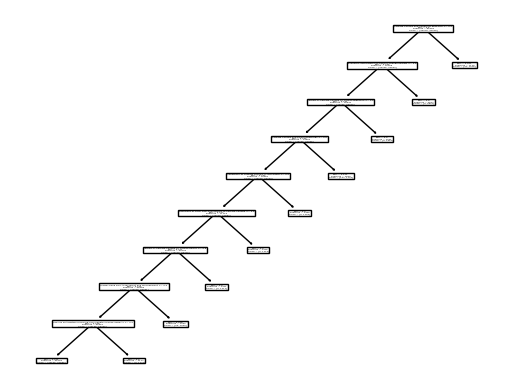

In [32]:
#10
tree.plot_tree(dtree, feature_names=list(X.columns))

INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
INFO:matplotlib.font_manager:Fontsize 0.35 < 1.0 pt not allowed by FreeType. Setting fontsi

[Text(0.9615384615384616, 0.99, 'Climate Change and Variability Research <= 0.5\ngini = 0.5\nsamples = 86284\nvalue = [43376, 42908]'),
 Text(0.9423076923076923, 0.97, 'Economic Implications of Climate Change Policies <= 0.5\ngini = 0.496\nsamples = 79168\nvalue = [43335, 35833]'),
 Text(0.9230769230769231, 0.95, 'Impact of Climate Change on Human Migration <= 0.5\ngini = 0.491\nsamples = 76341\nvalue = [43335, 33006]'),
 Text(0.9038461538461539, 0.93, 'Climate Change and Paleoclimatology <= 0.5\ngini = 0.486\nsamples = 74390\nvalue = [43335, 31055]'),
 Text(0.8846153846153846, 0.91, 'Adaptation to Climate Change in Agriculture <= 0.5\ngini = 0.482\nsamples = 72581\nvalue = [43228, 29353]'),
 Text(0.8653846153846154, 0.89, 'Resilience of Coral Reef Ecosystems to Climate Change <= 0.5\ngini = 0.477\nsamples = 71115\nvalue = [43228, 27887]'),
 Text(0.8461538461538461, 0.87, 'Impact of Climate Change on Human Health <= 0.5\ngini = 0.471\nsamples = 69700\nvalue = [43228, 26472]'),
 Text(0.

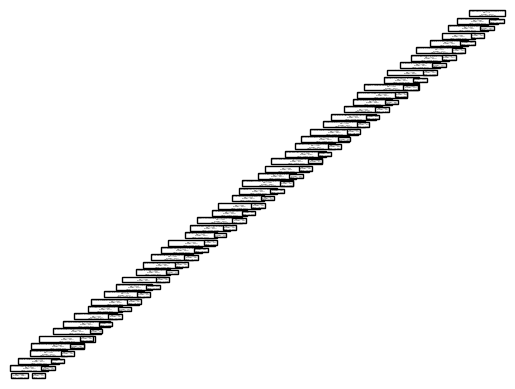

In [36]:
#50
tree.plot_tree(dtree, feature_names=list(X.columns))